<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad          

D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\DOWNLOAD\Anaconda\lib\site-packages\ipykernel_launcher.py:398: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

   capital-gain  capital-loss
0          2174             0
1             0             0
2             0             0
3             0             0
4             0             0
5             0             0
6             0             0
7             0             0
8         14084             0
9          5178             0
capital-gain  capital-loss
0             0               28330
              155                 1
              213                 4
              323                 3
              419                 3
dtype: int64


D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country', 'income',
       'age_set'],
      dtype='object')
age               0.000000
workclass         0.056386
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.017905
income            0.000000
age_set           0.000000
dtype: float64
222      90
430      80
918      81
1040     90
1168     88
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 121, dtype: int64
   workclass: Federal-gov  workclass: Local-gov  workclass: Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                     

D:\DOWNLOAD\Anaconda\lib\site-packages\ipykernel_launcher.py:508: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


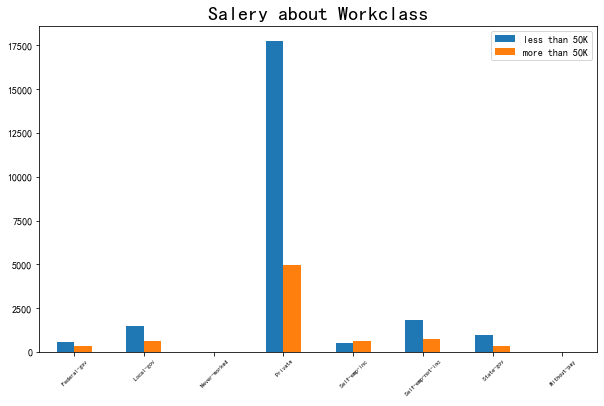

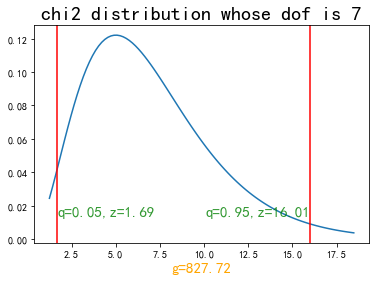

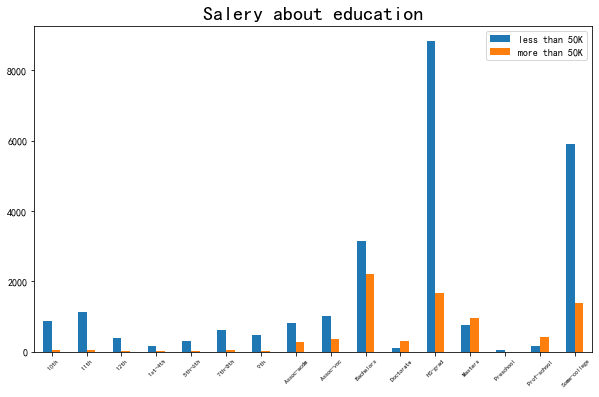

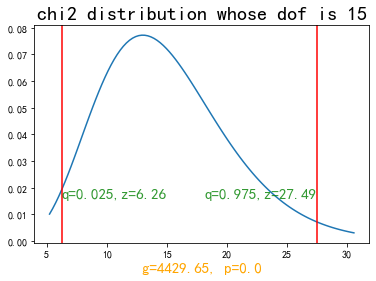

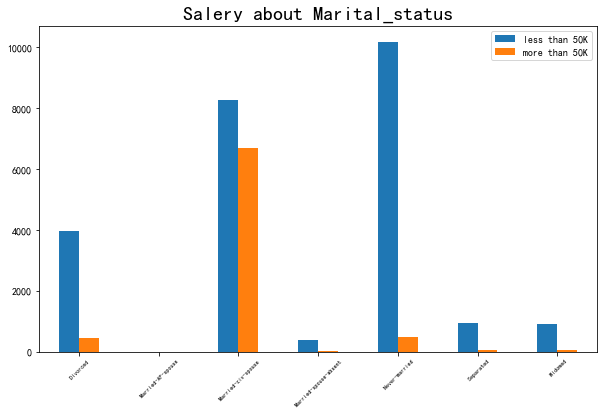

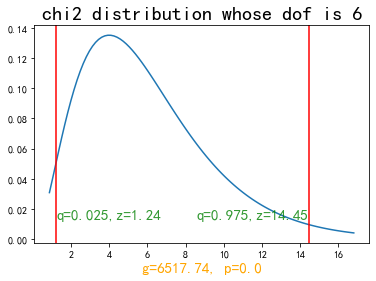

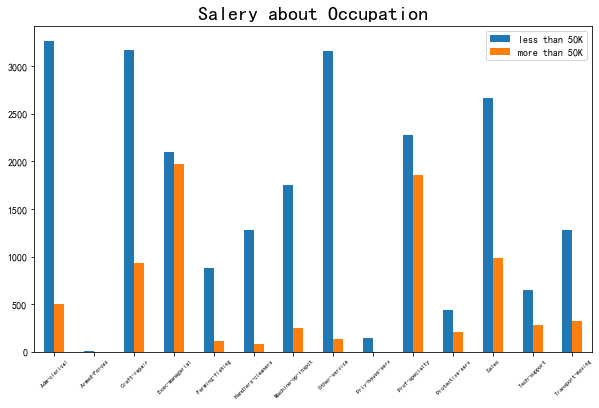

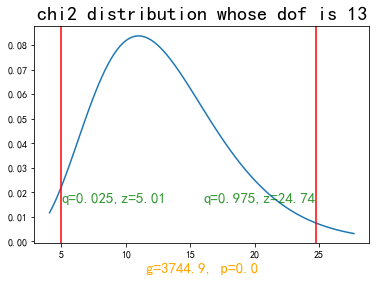

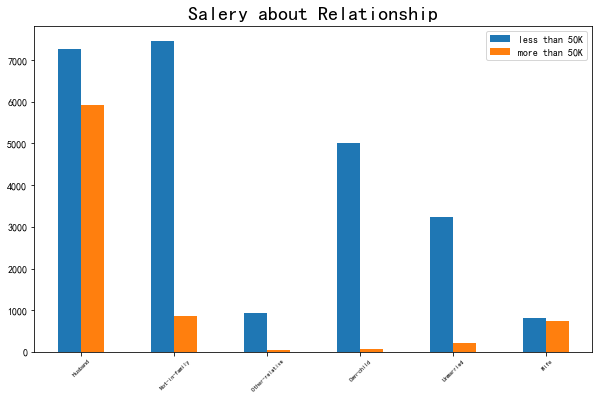

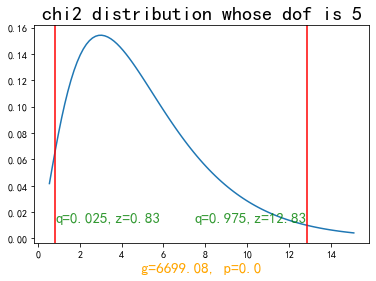

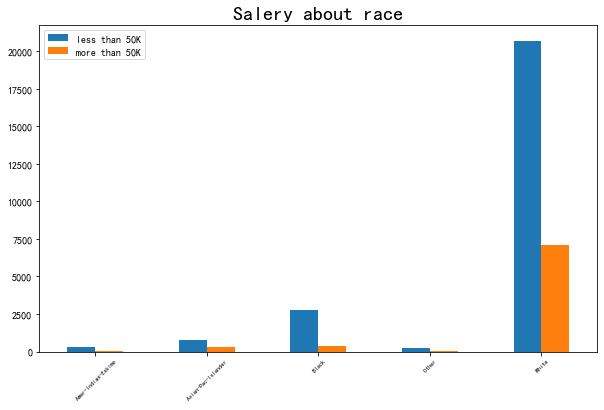

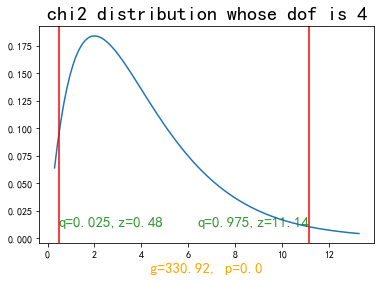

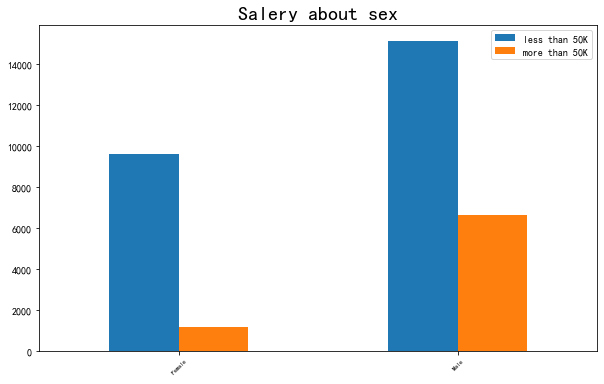

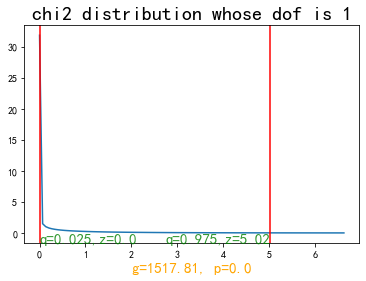

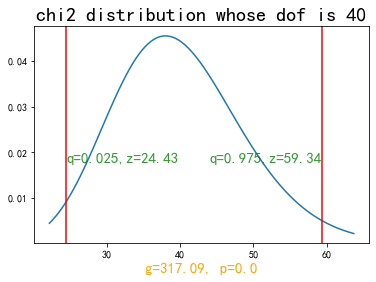

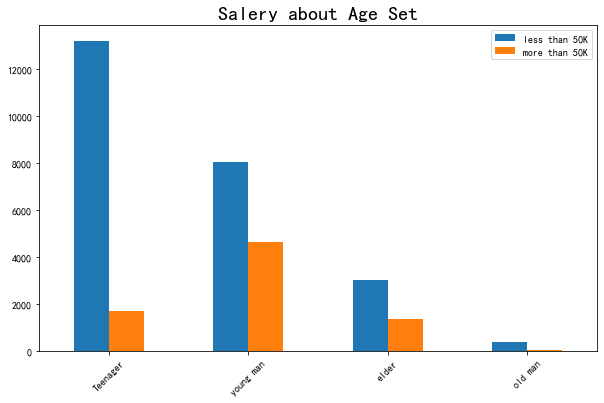

D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\DOWNLOAD\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


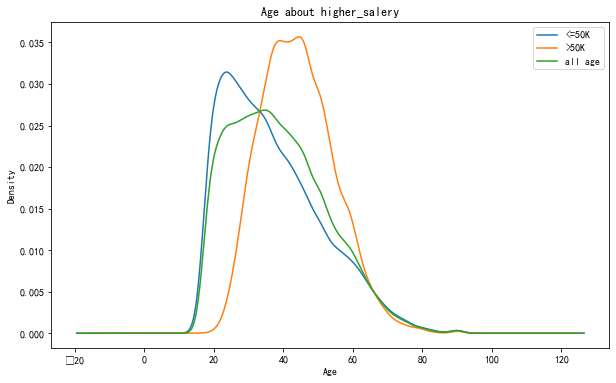

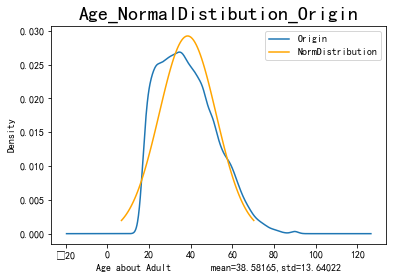

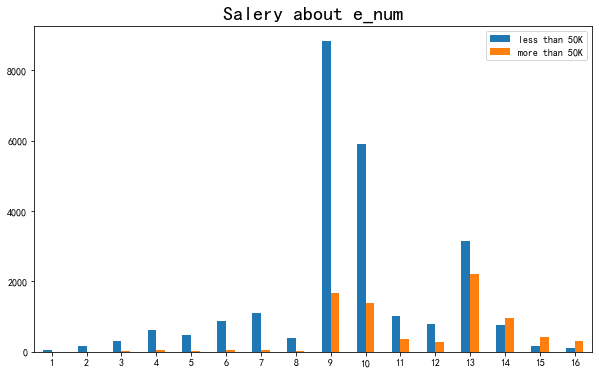

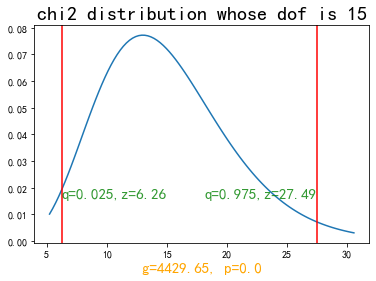

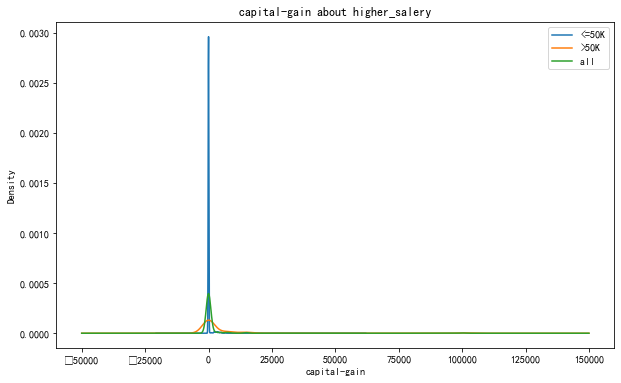

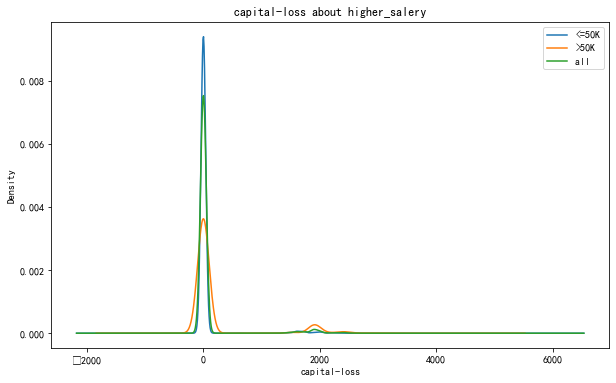

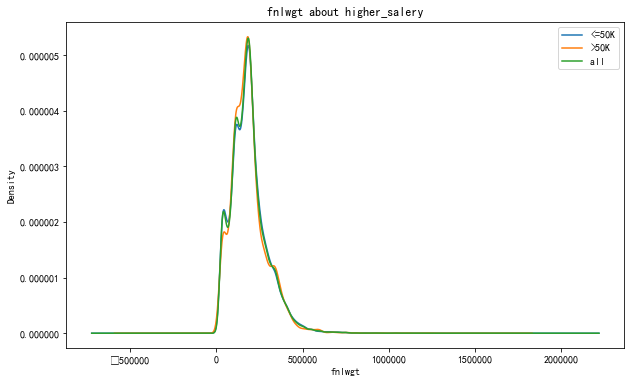

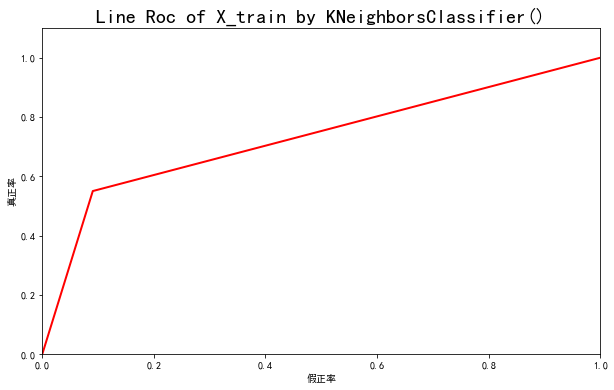

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
(32561, 129)
(32561,)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

adult_data = pd.read_csv("adult.data")
adult_test = pd.read_csv("adult.test", header=None, na_values=' ?')  # 不要表头
adult_train = pd.read_csv("adult.data", header=None, na_values=' ?')
Names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']
adult_test.columns = Names
adult_train.columns = Names
adult_train.info()
print(adult_train.head())
#-------------------------------------------数据查看-------------------------------------------

# ------------------------------对分类型数据的处理------------------------------

# --------------对workclass的处理----------------
work_income_less = adult_train['workclass'][adult_train['income'] == ' <=50K'].value_counts()
work_income_more = adult_train['workclass'][adult_train['income'] == ' >50K'].value_counts()
work_income = pd.concat([work_income_less, work_income_more], axis=1, sort=True)
work_income.columns = ['less than 50K', 'more than 50K']
work_income.fillna(0, inplace=True)
work_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, size=6)
plt.title('Salery about Workclass', size=20)
plt.savefig("Salery_about_workclass.png")
# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(work_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
# 绘制自由度为dof的卡方分布表
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.95,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.05,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2)), color='orange',size=15)
plt.savefig("W_and_Income_chi2_distribution.png")

# --------------对education的处理----------------
education_income_less = adult_train['education'][adult_train['income'] == ' <=50K'].value_counts()
education_income_more = adult_train['education'][adult_train['income'] == ' >50K'].value_counts()
education_income = pd.concat([education_income_less, education_income_more], axis=1, sort=True)
education_income.columns = ['less than 50K', 'more than 50K']
education_income.fillna(0, inplace=True)
education_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, size=6)
plt.title('Salery about education', size=20)
plt.savefig("Salery_about_education.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(education_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("E_and_Income_chi2_distribution.png")



# --------------对marital_status的处理----------------
marital_status_income_less = adult_train['marital-status'][adult_train['income'] == ' <=50K'].value_counts()
marital_status_income_more = adult_train['marital-status'][adult_train['income'] == ' >50K'].value_counts()
marital_status_income = pd.concat([marital_status_income_less, marital_status_income_more], axis=1, sort=True)
marital_status_income.columns = ['less than 50K', 'more than 50K']
marital_status_income.fillna(0, inplace=True)
marital_status_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, size=6)
plt.title('Salery about Marital_status', size=20)
plt.savefig("Salery_about_Marital_status.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(marital_status_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("M_and_Income_chi2_distribution.png")

# --------------对occupation的处理----------------
occupation_income_less = adult_train['occupation'][adult_train['income'] == ' <=50K'].value_counts()
occupation_income_more = adult_train['occupation'][adult_train['income'] == ' >50K'].value_counts()
occupation_income = pd.concat([occupation_income_less, occupation_income_more], axis=1, sort=True)
occupation_income.columns = ['less than 50K', 'more than 50K']
occupation_income.fillna(0, inplace=True)
occupation_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, size=6)
plt.title('Salery about Occupation', size=20)
plt.savefig("Salery_about_Occupation.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(occupation_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("O_and_Income_chi2_distribution.png")

# --------------对relationship的处理----------------
relationship_income_less = adult_train['relationship'][adult_train['income'] == ' <=50K'].value_counts()
relationship_income_more = adult_train['relationship'][adult_train['income'] == ' >50K'].value_counts()
relationship_income = pd.concat([relationship_income_less, relationship_income_more], axis=1, sort=True)
relationship_income.columns = ['less than 50K', 'more than 50K']
relationship_income.fillna(0, inplace=True)
relationship_income.plot(kind='bar', figsize=(10, 6))              # 设置图片大小
plt.xticks(rotation=45, size=6)
plt.title('Salery about Relationship', size=20)
plt.savefig("Salery_about_Relationship.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(relationship_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("R_and_Income_chi2_distribution.png")

# --------------对race的处理----------------
race_income_less = adult_train['race'][adult_train['income'] == ' <=50K'].value_counts()
race_income_more = adult_train['race'][adult_train['income'] == ' >50K'].value_counts()
race_income = pd.concat([race_income_less, race_income_more], axis=1, sort=True)
race_income.columns = ['less than 50K', 'more than 50K']
race_income.fillna(0, inplace=True)
race_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, size=6)
plt.title('Salery about race', size=20)
plt.savefig("Salery_about_Race.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(race_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("Ra_and_Income_chi2_distribution.png")

# --------------对sex的处理----------------
sex_income_less = adult_train['sex'][adult_train['income'] == ' <=50K'].value_counts()
sex_income_more = adult_train['sex'][adult_train['income'] == ' >50K'].value_counts()
sex_income = pd.concat([sex_income_less, sex_income_more], axis=1, sort=True)
sex_income.columns = ['less than 50K', 'more than 50K']
sex_income.fillna(0, inplace=True)
sex_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, size=6)
plt.title('Salery about sex', size=20)
plt.savefig("Salery_about_Sex.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(sex_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("S_and_Income_chi2_distribution.png")

# 对native_country进行查看数据，看看国家与工资的关系
native_country_income_less = adult_train['native-country'][adult_train['income'] == ' <=50K'].value_counts()
native_country_income_more = adult_train['native-country'][adult_train['income'] == ' >50K'].value_counts()
native_country_income = pd.concat([native_country_income_less, native_country_income_more], axis=1, sort=True)
native_country_income.columns = ['less than 50K', 'more than 50K']
native_country_income.fillna(0,inplace=True)
print(native_country_income)

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(native_country_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("NC_and_Income_chi2_distribution.png")

# --------------对Age的处理，数据进行离散化----------------
adult_train['age_set'] = pd.cut(adult_train['age'], bins=4, labels=['Teenager', 'young man', 'elder', 'old man'])
# 离散数据绘图
age_set_income_less = adult_train['age_set'][adult_train['income'] == ' <=50K'].value_counts()
age_set_income_more = adult_train['age_set'][adult_train['income'] == ' >50K'].value_counts()
age_set_income = pd.concat([age_set_income_less, age_set_income_more], axis=1, sort=True)
age_set_income.columns = ['less than 50K', 'more than 50K']
age_set_income.fillna(0, inplace=True)
age_set_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Salery about Age Set', size=20)
plt.savefig("Salery_about_Age_Set.png")

# 绘制线性图
plt.figure()
adult_train['age'][adult_train['income'] == ' <=50K'].plot(kind='kde', figsize=(10, 6))       # 分布图
adult_train['age'][adult_train['income'] == ' >50K'].plot(kind='kde')
adult_train['age'].plot(kind='kde')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age about higher_salery")
plt.legend(('<=50K', '>50K','all age'), loc='best')
plt.savefig("Age_kernel_density_estimation.png")

# 绘制正态拟合曲线
M_S = stats.norm.fit(adult_train['age'])                            # 正态拟合的平均值与标准差
plt.figure()
adult_train['age'].plot(kind='kde')                                 # 原本的概率密度分布图

normalDistribution = stats.norm(M_S[0], M_S[1])                   # 绘制拟合的正态分布图
x = np.linspace(normalDistribution.ppf(0.01), normalDistribution.ppf(0.99), 100)
plt.plot(x, normalDistribution.pdf(x), c='orange')
plt.xlabel('Age about Adult        '+'mean='+str(round(M_S[0], 5))+',std='+str(round(M_S[1], 5)))
plt.title('Age_NormalDistibution_Origin', size=20)
plt.legend(['Origin', 'NormDistribution'])
plt.savefig("Age_NormalDistibution_Origin.png")

# --------------对education_num的处理，数据进行离散化----------------
enum_income_less = adult_train['education-num'][adult_train['income'] == ' <=50K'].value_counts()
enum_income_more = adult_train['education-num'][adult_train['income'] == ' >50K'].value_counts()
enum_income = pd.concat([enum_income_less, enum_income_more], axis=1, sort=True)
enum_income.columns = ['less than 50K', 'more than 50K']
enum_income.fillna(0, inplace=True)
enum_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0)
plt.title('Salery about e_num', size=20)
plt.savefig("Salery_about_e_num.png")

# 独立性检验
from scipy.stats import chi2_contingency
g, p, dof, expected = chi2_contingency(enum_income)
'''
g: z值
p: 概率值
dof: 自由度
expected: 期望值
'''
from scipy.stats import chi2
import numpy as np
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))

# 以95%置信区间，查看小概率事件区间
plt.axvline(chi2.ppf(0.975, dof), color='r')
plt.axvline(chi2.ppf(0.025, dof), color='r')
plt.title('chi2 distribution'+' whose dof is '+str(dof),size=20)
plt.text(chi2.ppf(0.975, dof), 0.02, 'q=0.975,z='+str(round(chi2.ppf(0.975, dof), 2)), ha='right', va='top', color='g', alpha=0.8, size=15)
plt.text(chi2.ppf(0.025, dof), 0.02, 'q=0.025,z='+str(round(chi2.ppf(0.025, dof), 2)), ha='left', va='top', color='g', alpha=0.8, size=15)
plt.xlabel('g='+str(round(g,2))+', '+'p='+str(round(p,2)), color='orange',size=15)
plt.savefig("EN_and_Income_chi2_distribution.png")
'''
# --------------对hours-per-week的处理，数据进行离散化----------------
adult_train['hours_set'] = pd.cut(adult_train['hours-per-week'], bins=4, labels=['too free', 'few', 'common', 'too busy'])
# 离散数据绘图
hours_income_less = adult_train['hours_set'][adult_train['income'] == ' <=50K'].value_counts()
hours_income_more = adult_train['hours_set'][adult_train['income'] == ' >50K'].value_counts()
hours_income = pd.concat([hours_income_less, hours_income_more], axis=1, sort=True)
hours_income.columns = ['less than 50K', 'more than 50K']
print(hours_income)
hours_income.fillna(0, inplace=True)
hours_income.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0)
plt.title('Salery about hours set', size=20)
plt.savefig("Salery_about_hours_set.png")

# 绘制线性图
plt.figure()
adult_train['hours-per-week'][adult_train['income'] == ' <=50K'].plot(kind='kde', figsize=(10, 6))       # 分布图
adult_train['hours-per-week'][adult_train['income'] == ' >50K'].plot(kind='kde')
adult_train['hours-per-week'].plot(kind='kde')
plt.xlabel("hours-per-week")
plt.ylabel("Density")
plt.title("hours-per-week about higher_salery")
plt.legend(('<=50K', '>50K','all '), loc='best')
plt.savefig("hours_per_week_kernel_density_estimation.png")
'''
# --------------对capital-gain的处理----------------
# 绘制线性图
plt.figure()
adult_train['capital-gain'][adult_train['income'] == ' <=50K'].plot(kind='kde', figsize=(10, 6))       # 分布图
adult_train['capital-gain'][adult_train['income'] == ' >50K'].plot(kind='kde')
adult_train['capital-gain'].plot(kind='kde')
plt.xlabel("capital-gain")
plt.ylabel("Density")
plt.title("capital-gain about higher_salery")
plt.legend(('<=50K', '>50K','all '), loc='best')
plt.savefig("capital_gain_kernel_density_estimation.png")

# --------------对capital-loss的处理----------------
# 绘制线性图
plt.figure()
adult_train['capital-loss'][adult_train['income'] == ' <=50K'].plot(kind='kde', figsize=(10, 6))       # 分布图
adult_train['capital-loss'][adult_train['income'] == ' >50K'].plot(kind='kde')
adult_train['capital-loss'].plot(kind='kde')
plt.xlabel("capital-loss")
plt.ylabel("Density")
plt.title("capital-loss about higher_salery")
plt.legend(('<=50K', '>50K','all '), loc='best')
plt.savefig("capital_loss_kernel_density_estimation.png")

# 查看capital-gain与capital-loss数据
print(adult_train[['capital-gain','capital-loss']].head(10))
gain_loss = adult_train.groupby(['capital-gain','capital-loss'])
print(gain_loss.size().head())

# --------------对fnlwgt的处理----------------
# 绘制线性图
plt.figure()
adult_train['fnlwgt'][adult_train['income'] == ' <=50K'].plot(kind='kde', figsize=(10, 6))       # 分布图
adult_train['fnlwgt'][adult_train['income'] == ' >50K'].plot(kind='kde')
adult_train['fnlwgt'].plot(kind='kde')
plt.xlabel("fnlwgt")
plt.ylabel("Density")
plt.title("fnlwgt about higher_salery")
plt.legend(('<=50K', '>50K','all '), loc='best')
plt.savefig("fnlwgt_kernel_density_estimation.png")


# -------------------------------------------数据处理-------------------------------------------
# 删除不符合条件的列
adult_train_good = adult_train.drop(['fnlwgt','hours-per-week','capital-gain','capital-loss'],axis=1)
print(adult_train_good.columns)

# 查看每一列的缺失率
print(adult_train_good.isnull().sum()/adult_train_good.shape[0])

# -------------异常值处理-------------
# 3σ原则检测异常值
# 定义3σ法则识别异常值函数
def outRange(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    boolInd = (Ser1.mean()-3*Ser1.std() > Ser1) | (Ser1.mean()+3*Ser1.std() < Ser1)
    index = np.arange(Ser1.shape[0])[boolInd]       # range to array
    outrange = Ser1.iloc[index]
    return outrange

print(outRange(adult_train_good['age']))

# 提取出训练集
X_train = adult_train_good.drop(['income','age'], axis=1)
Y_train = adult_train_good['income']


X_train = pd.get_dummies(X_train, prefix_sep=':', columns=['workclass', 'education', 'education-num',
                                                                 'marital-status', 'occupation','race',
                                                                 'relationship', 'sex', 'native-country'
                                                           ,'age_set'], dummy_na=True)

print(X_train.head())
Y_train = pd.get_dummies(Y_train, drop_first=True).iloc[:,0]              # 取一列
print(Y_train)
# 哑变量处理
# 把空白值也当作变量处理

# 数据集划分
from sklearn.model_selection import train_test_split

X = X_train
y = Y_train

X_train, X_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state=12345)

# 标准化
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler().fit(X_train)             # 训练产生标准化的规则,因为数据集分为训练与测试，测试相当于后来的。

Xtrain = Standard.transform(X_train)                 # 将规则应用于训练集
Xtest = Standard.transform(X_test)                   # 将规则应用于测试集

# 进行分类算法
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = clf.predict(Xtest)

# 判定分类算法
from sklearn.metrics import classification_report, auc
print(classification_report(y_test, y_pred))


# 绘制roc曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 改字体
# 求出ROC曲线的x轴和Y轴
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))
plt.figure(figsize=(10, 6))
plt.xlim(0, 1)                              # 设定x轴的范围
plt.ylim(0.0, 1.1)                          # 设定y轴的范围
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.plot(fpr, tpr, linewidth=2, linestyle="-", color='red')
plt.title('Line Roc of X_train by KNeighborsClassifier()', size=20)
plt.show()

print(type(Standard.transform(X)))
print(type(y))
print(Standard.transform(X).shape)
print(y.shape)